In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load


%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [5]:
df['not.fully.paid'].isnull().mean()


0.0

In [6]:
df1=pd.get_dummies(df, columns=['purpose'])


In [7]:
df1['log.annual.inc'] = np.exp(df1['log.annual.inc'])


In [8]:
df1.head()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.000385,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,65000.000073,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,31999.999943,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,85000.000385,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,80799.999636,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [9]:
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)


not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

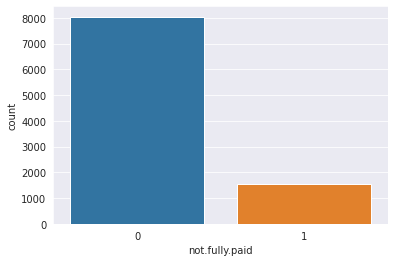

In [10]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

In [11]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()


In [12]:
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]

In [13]:
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)

In [14]:
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

Random over-sampling:
1    8045
0    8045
Name: not.fully.paid, dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

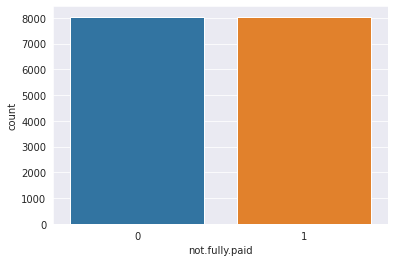

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

<AxesSubplot:>

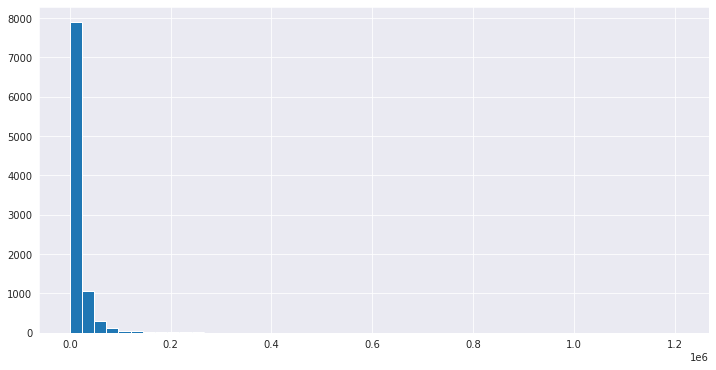

In [16]:
df['revol.bal'].hist(figsize=[12,6], bins=50)


In [17]:
df1=pd.get_dummies(df, columns=['purpose'])


Text(0.5, 0, 'FICO')

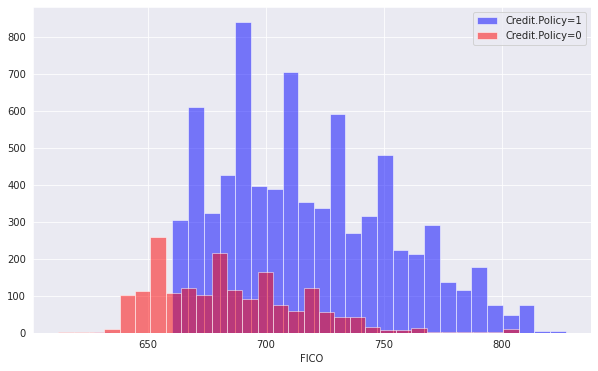

In [18]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

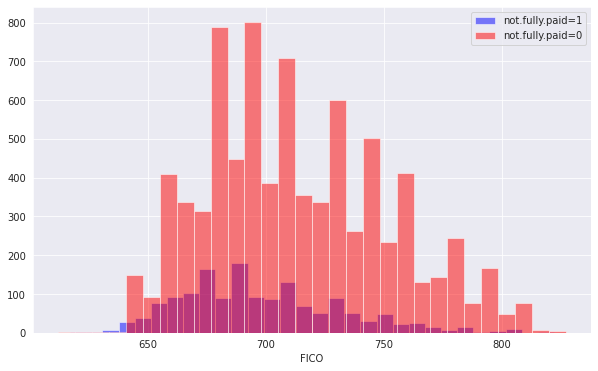

In [19]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

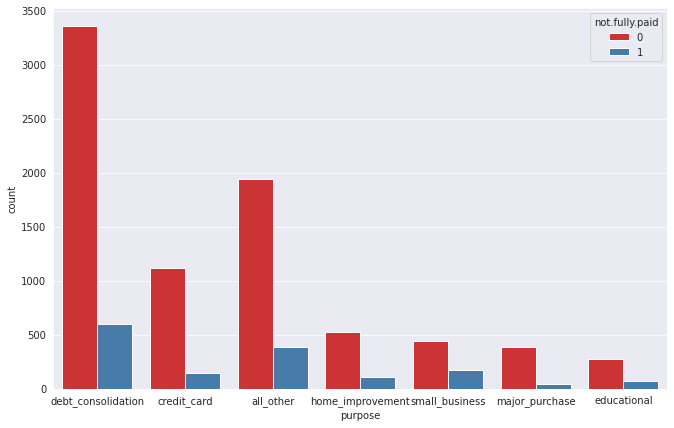

In [20]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

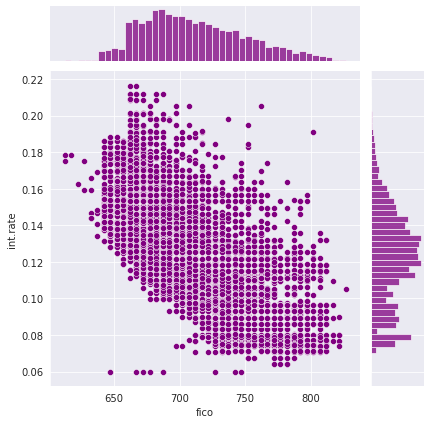

In [21]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')


<Figure size 792x504 with 0 Axes>

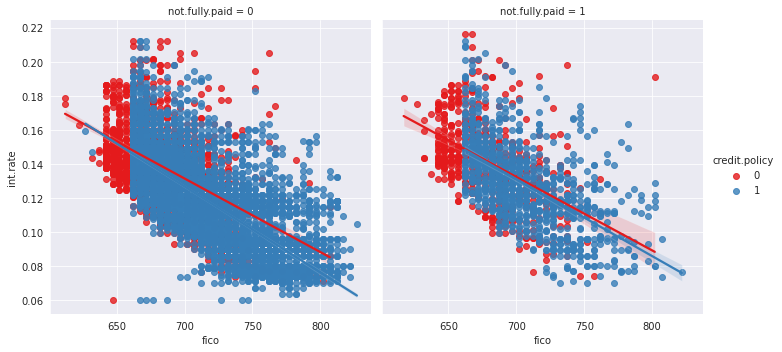

In [22]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [23]:
cat_feats = ['purpose']


In [24]:
final_data = pd.get_dummies(df_test_over,columns=cat_feats,drop_first=True)


In [25]:
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 4315
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [26]:
final_data.corr()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.295544,0.057990,0.018070,-0.098428,0.369263,0.092276,-0.197823,-0.104210,-0.541699,-0.062710,-0.062137,-0.193359,0.017078,0.016658,-0.033701,-0.016037,0.034915,-0.005971
int.rate,-0.295544,1.000000,0.277545,0.087808,0.212383,-0.680088,-0.107113,0.094883,0.420691,0.184805,0.147858,0.103555,0.216616,-0.038440,0.085005,-0.024312,-0.046381,-0.056611,0.177825
installment,0.057990,0.277545,1.000000,0.476910,0.030655,0.113450,0.185601,0.263186,0.049696,-0.008781,-0.002103,-0.030278,0.074420,-0.000241,0.112162,-0.099523,0.045572,-0.049599,0.187920
log.annual.inc,0.018070,0.087808,0.476910,1.000000,-0.026076,0.106830,0.352173,0.417839,0.077213,0.043729,0.019707,0.018162,-0.045483,0.076743,-0.029469,-0.116793,0.111364,-0.025610,0.119848
dti,-0.098428,0.212383,0.030655,-0.026076,1.000000,-0.228387,0.091460,0.209042,0.328635,0.032594,-0.024707,0.015360,0.058822,0.071149,0.180770,-0.029354,-0.099662,-0.078275,-0.050460
fico,0.369263,-0.680088,0.113450,0.106830,-0.228387,1.000000,0.266222,0.004232,-0.506991,-0.184167,-0.209333,-0.161569,-0.206154,-0.013839,-0.143780,-0.016698,0.104293,0.059528,0.070910
days.with.cr.line,0.092276,-0.107113,0.185601,0.352173,0.091460,0.266222,1.000000,0.280120,0.002073,-0.012952,0.073314,0.059873,-0.031152,0.049745,-0.004957,-0.051422,0.073477,-0.027389,0.056410
revol.bal,-0.197823,0.094883,0.263186,0.417839,0.209042,0.004232,0.280120,1.000000,0.199707,0.030217,-0.036001,-0.045501,0.056515,0.064350,0.002944,-0.036032,-0.004193,-0.062365,0.105354
revol.util,-0.104210,0.420691,0.049696,0.077213,0.328635,-0.506991,0.002073,0.199707,1.000000,-0.020935,-0.046918,0.077446,0.106418,0.083252,0.200376,-0.062894,-0.115662,-0.107918,-0.059585
inq.last.6mths,-0.541699,0.184805,-0.008781,0.043729,0.032594,-0.184167,-0.012952,0.030217,-0.020935,1.000000,0.000119,0.098895,0.174378,-0.041840,-0.043960,0.032035,0.072453,-0.009353,0.031996


<AxesSubplot:>

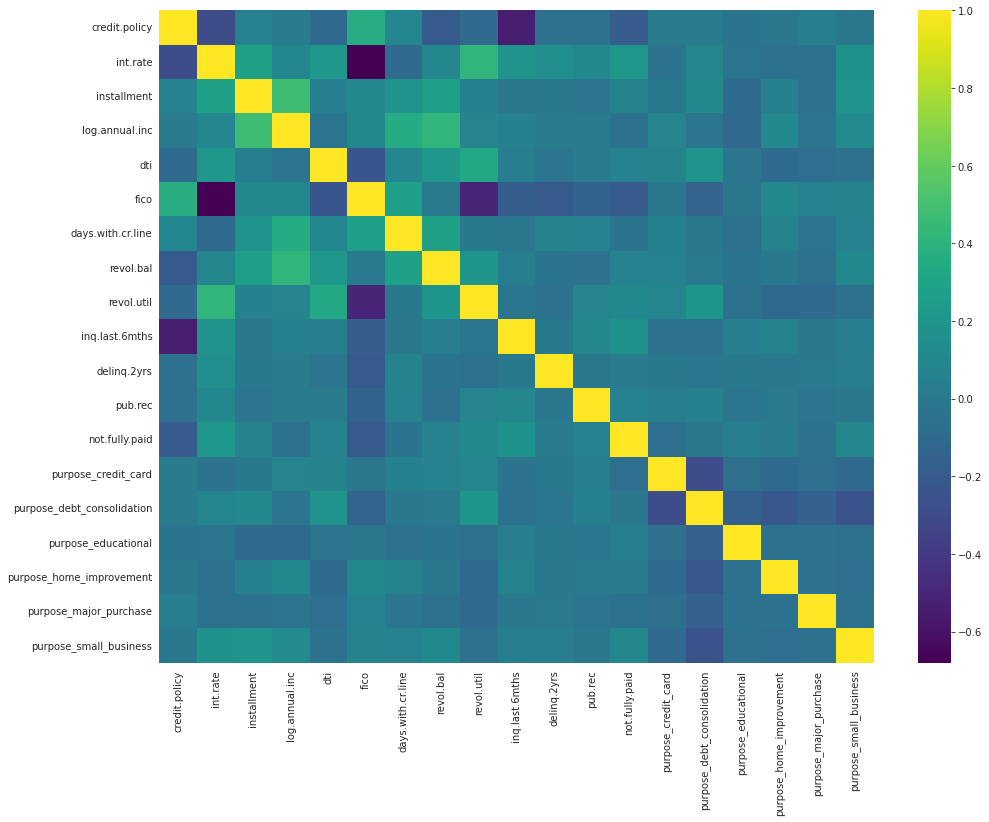

In [27]:
plt.figure(
        figsize=[16,12]
)

sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [28]:
to_drop2 = ['revol.bal', 'days.with.cr.line', 'installment', 'revol.bal']

final_data.drop(to_drop2, axis=1, inplace=True)

In [29]:
final_data.isnull().mean()


credit.policy                 0.0
int.rate                      0.0
log.annual.inc                0.0
dti                           0.0
fico                          0.0
revol.util                    0.0
inq.last.6mths                0.0
delinq.2yrs                   0.0
pub.rec                       0.0
not.fully.paid                0.0
purpose_credit_card           0.0
purpose_debt_consolidation    0.0
purpose_educational           0.0
purpose_home_improvement      0.0
purpose_major_purchase        0.0
purpose_small_business        0.0
dtype: float64

In [30]:
to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

In [31]:
X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train.shape


(11263, 15)

In [34]:
model = Sequential()

model.add(
        Dense(94, activation='relu')
)

model.add(
        Dense(30, activation='relu')
)

model.add(
        Dense(15, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

In [35]:
early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 6ms/step - loss: 0.6779 - accuracy: 0.5738 - val_loss: 0.6646 - val_accuracy: 0.5995
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6137 - val_loss: 0.6524 - val_accuracy: 0.6126
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6186 - val_loss: 0.6497 - val_accuracy: 0.6172
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6228 - val_loss: 0.6471 - val_accuracy: 0.6248
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6226 - val_loss: 0.6466 - val_accuracy: 0.6190
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.6304 - val_loss: 0.6447 - val_accuracy: 0.6273
Epoch 7/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6322 - val_loss: 0.6439 - val_accuracy: 0.6279
Epoch 8/200
4

<AxesSubplot:>

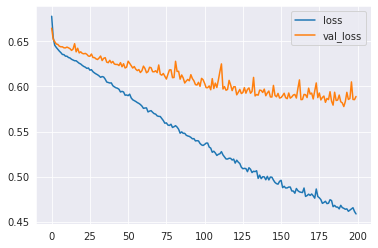

In [36]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [48]:
model_new = Sequential()

model_new.add(
        Dense(94, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(30, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(15, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 5ms/step - loss: 0.6813 - binary_accuracy: 0.5689 - val_loss: 0.6646 - val_binary_accuracy: 0.6022
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6654 - binary_accuracy: 0.5989 - val_loss: 0.6574 - val_binary_accuracy: 0.6099
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6578 - binary_accuracy: 0.6077 - val_loss: 0.6537 - val_binary_accuracy: 0.6058
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6562 - binary_accuracy: 0.6087 - val_loss: 0.6519 - val_binary_accuracy: 0.6089
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6540 - binary_accuracy: 0.6108 - val_loss: 0.6501 - val_binary_accuracy: 0.6116
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6493 - binary_accuracy: 0.6169 - val_loss: 0.6499 - val_binary_accuracy: 0.6099
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - los

<AxesSubplot:>

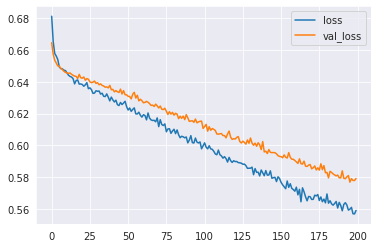

In [49]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot()


In [52]:
dump(scaler, open('scaler.pkl', 'wb'))
model_new.save('my_model_lending_club.h5')

In [53]:
later_scaler = load(open('scaler.pkl', 'rb'))
later_model = load_model('my_model_lending_club.h5')

In [54]:
X_OOT = to_pred.drop('not.fully.paid', axis=1).values
to_pred.drop('not.fully.paid', axis=1).values

print(X_OOT.shape)

(0, 15)
